# Implementing regressions

We begin by generating some data to work with. We'll use the same data we used in the previous section.

In [2]:
from numpy.random import default_rng
rng = default_rng(8675309)
N = 100
x = rng.uniform(high=10, size=(N,1))
ε = rng.normal(0, 7, size=(N,1))
y = 2 - 3*x + ε

## `statsmodels`

In [3]:
import statsmodels.api as sm

In `statsmodels` we can construct the design matrix simply by calling the `.add_constant()` method. This simply adds a column of ones to the beginning of the $X$ matrix.

In [4]:
X = sm.add_constant(x)

X[:5]

array([[1.        , 3.78932572],
       [1.        , 8.14510763],
       [1.        , 6.25815208],
       [1.        , 9.06732906],
       [1.        , 1.51201567]])

We then create our model and *fit* it. The most basic regression model is called the Ordinary Least Squares (OLS) model, which we use here. We store the results object from the `fit()` method in `results`.

In [5]:
model = sm.OLS(y, X)
results = model.fit()

We can see the regression output by calling the `summary()` method of this `results` object.

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     200.6
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.92e-25
Time:                        11:17:51   Log-Likelihood:                -322.88
No. Observations:                 100   AIC:                             649.8
Df Residuals:                      98   BIC:                             655.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2501      1.394      1.614      0.1

The output provides information about the model. The main things to focus on are the coefficient estimates for `const` and `x1`. For each coefficient, we see:

- The **coefficient estimate**, `coef`. The estimates here match what we calculated above.

- The **standard error** of the estimate, `std err`. This is the standard deviation of our estimate. The estimate itself is a random variable, so it has a distribution. If we could run this regression on different data repeatedly, $\hat\beta$ would vary across samples. But how much would it vary? The standard error gives an estimate of the standard deviation of that distribution. The smaller is the standard error, the more precise is our estimate, and the more confident we are that the estimate is close to the true value.

- The **t-statistic**, `t`. This is simply `coef` divised by `std err`. It tells us how many standard deviations from zero is the coefficient estimate. The more standard deviations from zero is the coefficient, the more confident we can be that the coefficient is not zero (and that the coefficient should therefore be included in our model). Recall that 95% of a Normal pdf lies within 1.96 standard deviations of the mean, so a conventional cutoff value to determine that a result is *statistically significant* is 1.96. To be even more sure, we could use a cutoff of 2.58, corresponding to a 99% confidence level.

- The **p-value**, `P>|t|`. This is the probability that, under the *null hypothesis* that $\beta=0$, we would see a coefficient estimate as large as `coef`. In other words, it is the probability of getting this coefficient estimate even if the true coefficient is zero. The smaller this number is, the more confident we can be that the true value of the coefficient is not zero. Conventional cutoff values for this value are 0.05 or 0.01, meaning we have only a 5% or a 1% chance of incorrectly getting a non-zero estimate. For technical statistical reasons, the $p$-values are calculated from the $t$-distribution with parameter $\nu$ equal to the $N-K$, shown in `DF Residuals`. As long as this is reasonably large (say, about 100), it is very close to a Normal distribution.

- The 95% **confidence interval**, with a 2.5% lower bound (`0.025`) and the 97.5% upper bound (`0.975`). This gives the lower and upper bound for the range in which we expect the true value of $\beta$ to lie, in 95% of samples. If this range includes zero, we cannot be 95% confident that the true coefficient is not zero.

Note that the $t$-statistic, $p$-value, and confidence intervals each provide a different way of determining the same thing — whether the coefficient estimate is statistically significant, meaning we are confident that it is not zero. If we do not have significant statistical evidence that the coefficient is *not* zero, we will not reject the null hypothesis, and must conclude that the true coefficient may be zero. (The assumption here is that the *null hypothesis* for the coefficient values are zero. We might choose a different null hypothesis depending on the economic meaning of the regression we are running. For example, a reasonable null hypothesis for the $\beta$ coefficient in a CAPM regression, which we will discuss later, is that it equals one.)

All of the values reported here are available as properties of the `results` object.

In [7]:
# coefficient (a.k.a. "parameter") estimates
results.params

array([ 2.25006151, -3.21306049])

In [8]:
# standard errors
results.bse

array([1.39446419, 0.22687479])

In [9]:
results.tvalues

array([  1.61356708, -14.16226327])

In [10]:
results.pvalues

array([1.09836933e-01, 1.91579434e-25])

In [11]:
results.conf_int()

array([[-0.51720728,  5.0173303 ],
       [-3.66328612, -2.76283485]])

The $R^2$, reported in the top right, matches what we saw previously for these data. (The adjusted $R^2$ makes a small adjustment for now many regressors are in the model.)

In [12]:
results.rsquared

0.6717684356677902

The residuals in the model, $y_i - \hat y_i$, are stored in `results.resid`.

In [13]:
results.resid

array([ -5.91397468,   5.07665738,  -6.98873   ,  -4.77994096,
         0.49220215,  -3.96302479,  -0.01640861,   0.62167248,
        -8.93456945,   4.75380849,  -3.38790079,   0.59063684,
         0.56155237,   6.58183194,  -3.48127291,  10.05438448,
         3.67793934,   3.3280935 ,   9.33665701,   4.38616836,
        11.25593172,   2.368698  ,  -3.61804042,  -2.92435415,
        -0.68969778,  -1.83603276,   0.06247803,   0.53630417,
         7.08035302,  -6.39939944,   2.32779418,  -1.08186821,
         0.83827227,   3.80096487,  -0.13286615, -11.63278491,
        12.78918804,   8.64175088,  -6.59585822,   3.59027232,
        -4.88406231,   0.86884297,  -9.46777888,   8.00687785,
        -5.67446301,  -1.42314026,  -1.11552602,   3.18585992,
         6.33387461,   2.61309851,  -2.83416709,  10.72126541,
        -3.97561675,   4.27015649,   3.15769668,   6.44483539,
         9.20391077,  -6.29658009,  -2.62055196,   1.77883887,
       -15.65130528,   5.09749229,   4.16405288,  -3.27

Notice also that the skewness and kurtosis of the residuals, reported on the bottom left of the summary table, match what we would expect for a Normally distributed random variable.

In [14]:
import scipy.stats as scs

scs.skew(results.resid)

-0.24898612136624373

In [15]:
scs.kurtosis(results.resid) + 3

2.9041857964065585

We can calculate predicted values for values of $x$ from using the `results.predict` method. Here, we'll use our model to predict data for $x={-3, -2, \ldots, 12}$.

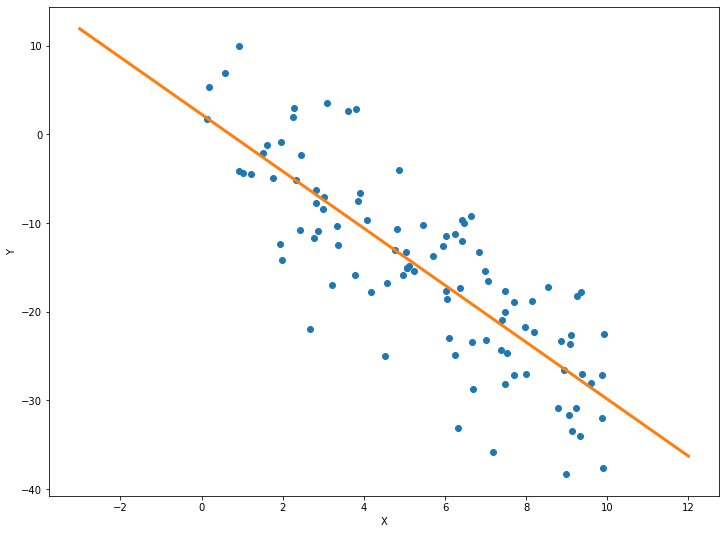

In [58]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(x, y, 'o')

# calculate predicted values
xvals = np.arange(-3,13)
y_hat = results.predict(sm.add_constant(xvals))

ax.plot(xvals, y_hat, lw=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## `sklearn`

Scikit-learn is a module that provides extensive capabilities for machine learning (ML). Since linear regression is one of the tools of ML methods, it is included among many other types of models.

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lin_reg = LinearRegression()

lin_reg.fit(x, y)  # note that we don't pass the X matrix augmented with 1s

LinearRegression()

Again, the coefficient estimates are identical to the previous methods.

In [61]:
lin_reg.intercept_

array([2.25006151])

In [62]:
lin_reg.coef_

array([[-3.21306049]])

In [63]:
# R-squared
lin_reg.score(x,y)

0.6717684356677902

### Standard errors and t-statistics

`sklearn` doesn't give standard errors but we can calculate them. We simply use the equation for the variance-covariance matrix of the coeffient estimates,

$$\var(\hat\beta) = \hat\sigma^2(X'X)^{-1}.$$ 

In [64]:
from numpy.linalg import inv

RSS = (1 - lin_reg.score(x,y)) * y.var() * N

N, K = x.shape

varcov = RSS/(N-K) * inv(X.T @ X)

varcov

array([[ 1.92488865, -0.28082839],
       [-0.28082839,  0.05095225]])

The diagonal elements of this matrix give the estimated variance of each coefficent, which we can use to calculate the standard errors. The calculated values are very similar to the `statsmodels` results, but vary slightly due to different statistical assumptions embedded in the calculation.

In [65]:
np.sqrt(varcov.diagonal())

array([1.38740356, 0.22572605])

In [66]:
np.c_[(lin_reg.intercept_, lin_reg.coef_)] / np.sqrt(varcov.diagonal())

array([[  1.62177867, -14.23433632]])

## Nonlinear data

What if our data isn't linear?

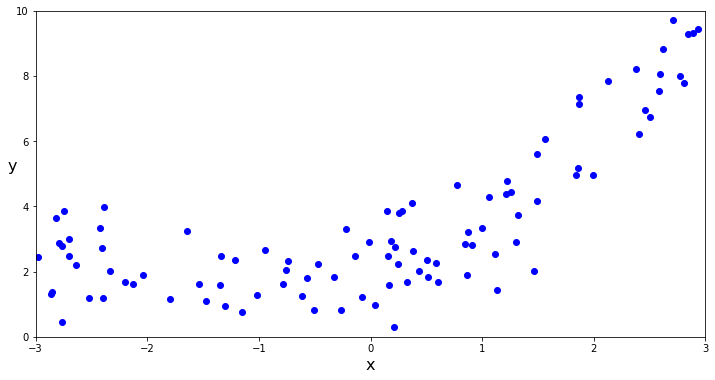

In [74]:
x = 6 * rng.uniform(size=(N,1)) - 3
y = 2 + x + 0.5*x**2 + rng.standard_normal(size=(N, 1))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, y, 'bo')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', rotation=0, fontsize=16)
ax.axis([-3, 3, 0, 10])
plt.show()

In [75]:
X = np.c_[np.ones(N), x, x**2]
X[:5]

array([[ 1.        ,  0.86551968,  0.74912432],
       [ 1.        , -1.33982714,  1.79513677],
       [ 1.        , -1.35113649,  1.82556983],
       [ 1.        ,  2.89001064,  8.3521615 ],
       [ 1.        , -0.57339857,  0.32878593]])

In [76]:
model2 = sm.OLS(y, X)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.80e-37
Time:                        11:41:17   Log-Likelihood:                -140.79
No. Observations:                 100   AIC:                             287.6
Df Residuals:                      97   BIC:                             295.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0611      0.145     14.201      0.0

In scikit-learn we can easily add additional polynomial terms.

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

x_poly[:5]

array([[ 1.        ,  0.86551968,  0.74912432],
       [ 1.        , -1.33982714,  1.79513677],
       [ 1.        , -1.35113649,  1.82556983],
       [ 1.        ,  2.89001064,  8.3521615 ],
       [ 1.        , -0.57339857,  0.32878593]])

In [78]:
lin_reg2 = LinearRegression(fit_intercept=False)
lin_reg2.fit(x_poly, y)
lin_reg2.coef_

array([[2.06114078, 1.07527261, 0.45043034]])

In [79]:
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x)

lin_reg2.fit(x_poly, y)
lin_reg2.coef_

array([[ 2.06825355,  0.83379512,  0.4774944 ,  0.04102555, -0.00357288]])